In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [50]:
# Cargar el archivo CSV
df = pd.read_csv('/content/drive/MyDrive/Practico Coink/Data Proyec Coink/depositos_oinks.csv')


## Explorar los primeros registros para entender la estructura de los datos

In [51]:
# Mostrar primeras lineas del DataFrame
df.head()

,Unnamed: 0,user_id,operation_value,operation_date,maplocation_name,user_createddate
0,0,0e52d550-ae23-407a-9b1f-6e5fb1f066ab,273850.0,2022-01-14 13:07:56,CC Plaza de las Américas - Plaza Mariposa,2022-01-09 19:23:18.332689
1,1,975ed41e-d891-4c23-aeba-06363019d8e3,900.0,2022-02-06 13:11:25,CC Plaza de las Américas - Plaza Mariposa,2022-01-10 15:19:29.419075
2,2,f9043545-dfc2-402f-a8c7-0a61f21cb719,1800.0,2022-02-23 14:01:56,Universidad de los Andes - ML Piso 5,2021-08-25 12:44:48.524941
3,3,979ca8ad-9600-4a1f-81e9-e70c2f55cdc5,6500.0,2021-12-16 12:09:45,CC Plaza de las Américas - Plaza Mariposa,2021-07-17 17:11:16.766291
4,4,171db06e-2e4b-4542-a9c9-32028520fda4,150000.0,2022-01-25 12:00:18,CC Plaza de las Américas - Plaza Mariposa,2022-01-11 15:59:27.651994


In [52]:
# Mostrar las primeras filas del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        4345 non-null   int64  
 1   user_id           4345 non-null   object 
 2   operation_value   4345 non-null   float64
 3   operation_date    4345 non-null   object 
 4   maplocation_name  4345 non-null   object 
 5   user_createddate  4345 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 203.8+ KB


In [53]:
# Mostrar estadistica Descriptiva columna operation_value
operation_value = df['operation_value'].describe()
operation_value = operation_value.astype(int)
operation_value


count       4345
mean       34618
std       107142
min           50
25%         1650
50%         5600
75%        22300
max      2595000
Name: operation_value, dtype: int64

Se tiene un total de 4.345 datos en el DF
teniendo en cuenta la cantidad de usuarios y el monto de los transacciones el promedio del valor de la operacion es de $34.618.
El valor mas pequeño es de 50cop
El 25% de las transacciones tienen un valor menos o igual a 1.650, la mediana de las transacciones es de 5.600cop, es decir que la mitad de las transacciones tiene un valor menor o igual a este dato, el 75% de las transacciones tiene un valor menos o igual a 22.300cop
El mayor deposito fue por un valor de 2.595.000cop

In [54]:
# mostrar valores nulos
df.isnull().sum()

Unnamed: 0          0
user_id             0
operation_value     0
operation_date      0
maplocation_name    0
user_createddate    0
dtype: int64

In [55]:
# Convertir la columna 'operation_date' a tipo datetime
df['operation_date'] = pd.to_datetime(df['operation_date'])


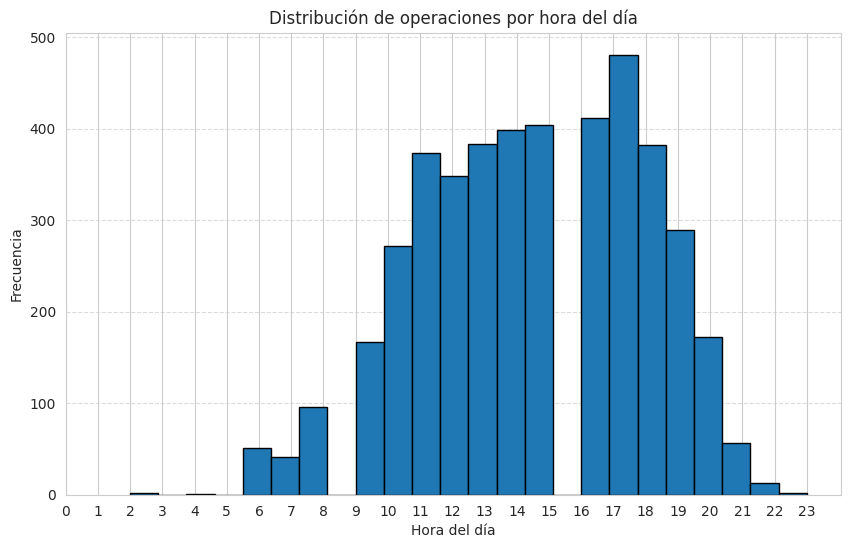

In [56]:
# Crear una nueva columna 'hour' que contenga la hora de la 'operation_date'
df['hour'] = df['operation_date'].dt.hour

# Visualizar el histograma de horas
# tamaño grafica
plt.figure(figsize=(10, 6))

# Distribucion por horas del dia
plt.hist(df['hour'], bins=24, edgecolor='black')
plt.xlabel('Hora del día')

#titulos grafica
plt.ylabel('Frecuencia')
plt.title('Distribución de operaciones por hora del día')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Se evidencia una mayor cantidad de transacciones entre las 10 de la mañana y las 7 de la noche, entre las 8am-9am no se registran transacciones, entre las 3pm-4pm, no se registran operaciones, entre las 11 de la noches y las 6 de la mañana se registra poca o nula operatividad.

In [57]:
# Obtener una lista de los valores únicos en la columna maplocation_name
valores_unicos = df['maplocation_name'].unique()
valores_unicos


array(['CC Plaza de las Américas  - Plaza Mariposa',
       'Universidad de los Andes - ML Piso 5',
       'CC Los Molinos - Zona Montaña Nivel 2'], dtype=object)

Contamos con tres ubicaciones :
1- CC las Americas
2- Universidad de los Andes
3- CC Molinos

In [89]:
# Contar la cantidad de usuarios únicos por ubicación
usuarios_por_ubicacion = df.groupby('maplocation_name')['user_id'].nunique().reset_index()

# Mostrar la cantidad de usuarios únicos por ubicación
print(usuarios_por_ubicacion)


                             maplocation_name  user_id
0       CC Los Molinos - Zona Montaña Nivel 2      756
1  CC Plaza de las Américas  - Plaza Mariposa      654
2        Universidad de los Andes - ML Piso 5      248


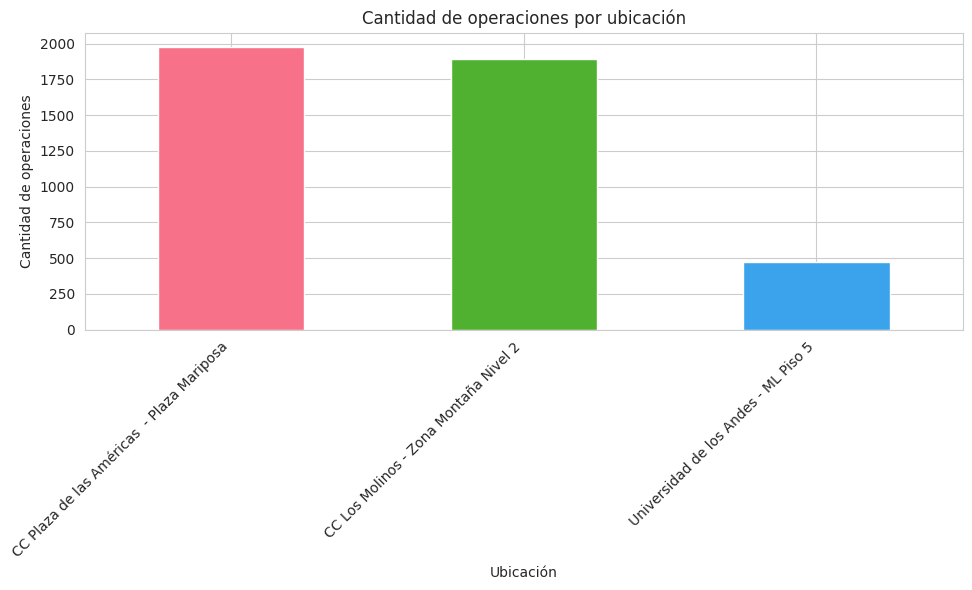

In [58]:

# Paleta de colores
colors = sns.color_palette("husl", len(location_counts))

# Crear el gráfico de barras con la cuenta de valores únicos
# tamaño grafico y colores
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color=colors)
plt.title('Cantidad de operaciones por ubicación')

# titulos Grafico
plt.xlabel('Ubicación')
plt.ylabel('Cantidad de operaciones')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se evidencia una mayor operativa en los dos centros comerciales con una cantidad superior sobre las 1.500 operaciones, y se evidencia una operatividad muy baja en la universidad de los andes, con una cantidad promedio a 400 transacciones, estamos hablando que de 15.000 estudiantes promedio matriculados en planes de posgrado y pregrado, la Universidad De los andes solo tiene registrados 248 usuarios, que equivale al 1.6% de la poblacion estudiantil.


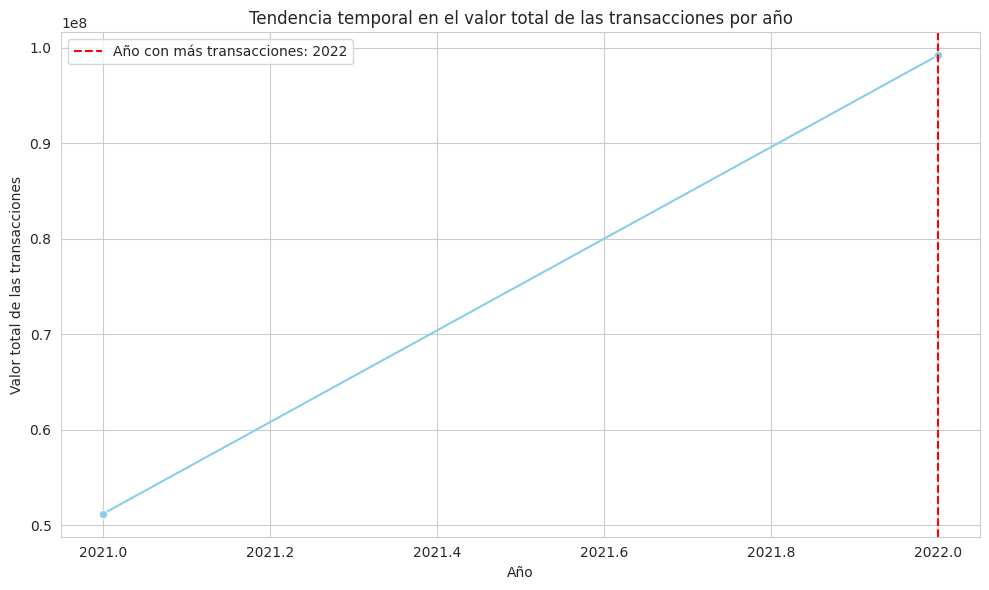

In [59]:
# Convertir la columna 'operation_date' a tipo datetime
df['operation_date'] = pd.to_datetime(df['operation_date'])

# Obtener el año de cada fecha en 'operation_date'
df['year'] = df['operation_date'].dt.year

# Consolidar los datos por años y sumar total de las operaciones por año
consolidado_por_anio = df.groupby('year')['operation_value'].sum().reset_index()

# Encontrar el año con la suma total máxima de operaciones
anio_max_transacciones = consolidado_por_anio.loc[consolidado_por_anio['operation_value'].idxmax(), 'year']


sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Crear el gráfico de líneas con la tendencia temporal en el valor total de las transacciones por año
sns.lineplot(x='year', y='operation_value', data=consolidado_por_anio, marker='o', color='skyblue')

# Resaltar el año con más transacciones
plt.axvline(x=anio_max_transacciones, color='red', linestyle='--', label=f'Año con más transacciones: {anio_max_transacciones}')

# Añadir título y etiquetas
plt.title('Tendencia temporal en el valor total de las transacciones por año')
plt.xlabel('Año')
plt.ylabel('Valor total de las transacciones')

# Mostrar la leyenda
plt.legend()

# Mostrar la visualización
plt.tight_layout()  # Ajustar automáticamente el espaciado para evitar superposiciones
plt.show()


In [60]:
# Consolidar los datos por años y calcular la suma total de las operaciones por año
sumas_por_anio = df.groupby('year')['operation_value'].sum()

# Mostrar las sumas por año de las transacciones
sumas_por_anio


year
2021    51195450.0
2022    99221300.0
Name: operation_value, dtype: float64

<ipython-input-61-c9481f77d879>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='operation_value', data=sumas_por_anio, palette='viridis')


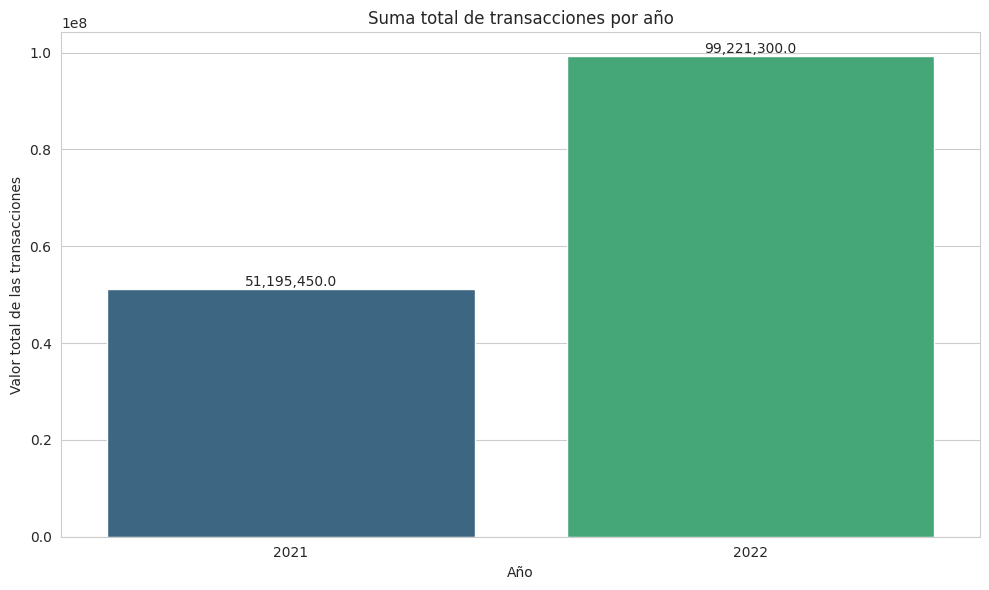

In [61]:
# Obtener el año de cada fecha en 'operation_date'
df['year'] = df['operation_date'].dt.year

# Consolidar los datos por años y calcular la suma total de las operaciones por año
sumas_por_anio = df.groupby('year')['operation_value'].sum().reset_index()

# Configurar el estilo y tamaño de la visualización
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Crear el gráfico de barras con las sumas por año de las transacciones
sns.barplot(x='year', y='operation_value', data=sumas_por_anio, palette='viridis')

# Añadir etiquetas con los valores totales en cada barra
for index, row in sumas_por_anio.iterrows():
    plt.text(row.name, row.operation_value, f'{row.operation_value:,}', ha='center', va='bottom')

# Añadir título y etiquetas a los ejes
plt.title('Suma total de transacciones por año')
plt.xlabel('Año')
plt.ylabel('Valor total de las transacciones')

# Mostrar la visualización
plt.tight_layout()
plt.show()


El año con mas cantidad de transacciones fue el año 2022 con un total de 99.231.300cop

<ipython-input-62-dac8b5b12b97>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='maplocation_name', y='operation_value', data=df, palette='Set3')


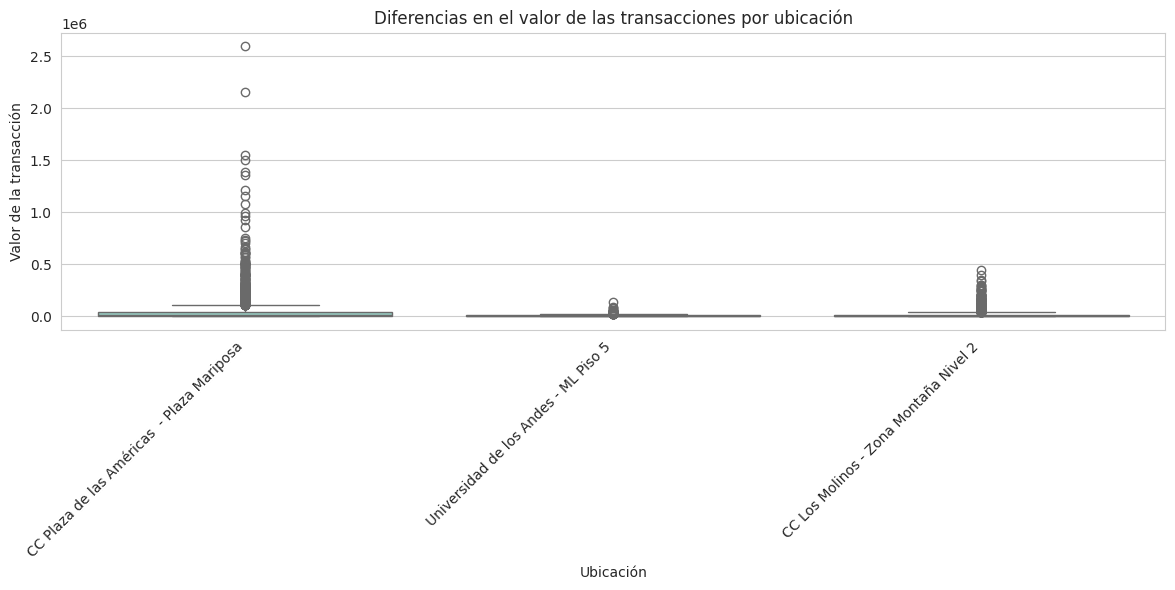

In [62]:

# estilo y tamaño de la visualización
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Crear el boxplot para ver las diferencias en el valor de las transacciones por ubicación
sns.boxplot(x='maplocation_name', y='operation_value', data=df, palette='Set3')

# Añadir título y etiquetas
plt.title('Diferencias en el valor de las transacciones por ubicación')
plt.xlabel('Ubicación')
plt.ylabel('Valor de la transacción')

# Rotar las etiquetas en el eje x para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar la visualización
plt.tight_layout()


Se evidencia que en el CC Americas se realizo dos depositos mayores a 2 millones cop y que la mayor concentracion esta entre 50 y 500.000, el tiket promedio de concentracion en la universidad de los Andes esta entre 50cop y 100cop

<Figure size 1000x600 with 0 Axes>

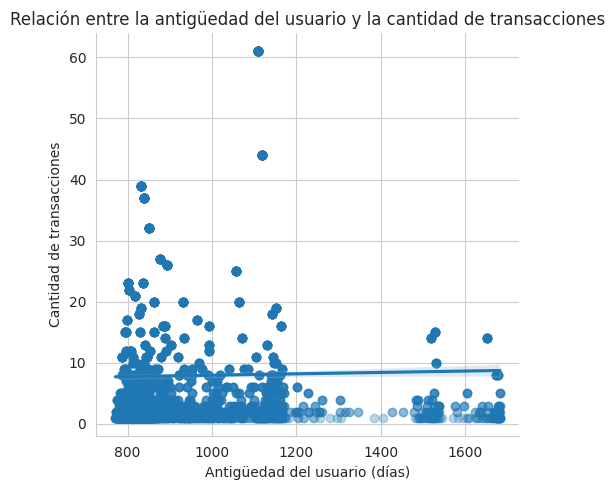

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Convertir la columna 'user_createddate' a tipo datetime si aún no lo has hecho
df['user_createddate'] = pd.to_datetime(df['user_createddate'])

# Calcular la antigüedad del usuario en días
hoy = datetime.now()
df['antiguedad_usuario'] = (hoy - df['user_createddate']).dt.days

# Configurar el estilo y tamaño de la visualización
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Crear el lmplot para visualizar la relación entre la antigüedad del usuario y la cantidad de transacciones
sns.lmplot(x='antiguedad_usuario', y='cantidad_transacciones', data=df, scatter_kws={'alpha':0.3})

# Añadir título y etiquetas a los ejes
plt.title('Relación entre la antigüedad del usuario y la cantidad de transacciones')
plt.xlabel('Antigüedad del usuario (días)')
plt.ylabel('Cantidad de transacciones')

# Mostrar la visualización
plt.tight_layout()
plt.show()


Teniendo en cuenta la grafica, se muestra usuarios con antiguedad entre 800 a 1.000 dias con un promedio de transacciones entre 0 y 10

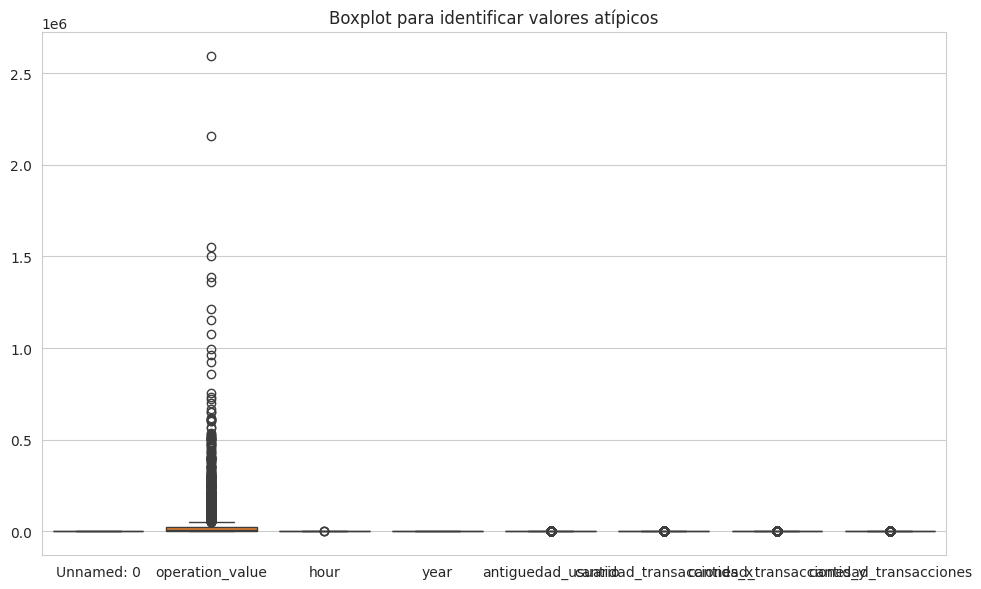

In [73]:
# Filtrar las columnas numéricas en el DataFrame
df_numeric = df.select_dtypes(include=['number'])

# estilo y tamaño de la visualización
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Crear el boxplot para identificar valores atípicos en todas las variables numéricas
sns.boxplot(data=df_numeric)

# Añadir título a la visualización
plt.title('Boxplot para identificar valores atípicos')

# Mostrar la visualización
plt.tight_layout()
plt.show()


Los valores atipicos o menos frecuentes estan entre 800.000cop hasta 2.695.000cop